In [1]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

In [61]:
plt.style.use('dark_background')

In [62]:
stock_tags = ['ACGL',
              'ADM',
              'AFL',
              'ALL',
             'ALXN',
              'ANTM',
              'BBL',
              'BHP',
#             'BLK',
#              'BNS',
#              'BSBR',
#              'BTI',
#             'CB',
#              'CBRE',
#              'CI',
#              'CINF',
#             'DAL',
#              'DGX',
#              'DHI',
#              'EC',
#              'EQR',
#             'ESS',
#              'FITB',
#              'FMX',
#              'FOXA',
#             'FTV',
#              'GD',
#              'GOLD',
#              'HIG',
#             'INFO',
#              'JCI',
#              'L',
#              'LH',
#              'LHX',
#             'MAA'
             ]

In [104]:
def get_graph(stock_name, start_load, end_load, start_fib, end_fib):
    
    print(stock_name)
    
    df = web.DataReader(stock_name, data_source = 'yahoo', start = start_load, end = end_load)

    print('Starting: ' + str(df['Open'][0]))
    print('  Ending: ' + str(df['Open'][len(df)-1]))
    
    df['Open'].plot(figsize=(16,6), color='blue')
    df_average = df['Open'].rolling(10).mean()
    df_average.plot(figsize=(16,6), color='cyan')
    
    df_trend = df['Open'].copy()
    for i in range(1,len(df_trend)-1):
        df_trend[i]=0
    
    plt.axhline(y=(np.max(df['Open'][start_fib:end_fib])), color='r')
    plt.axhline(y=(np.min(df['Open'][start_fib:end_fib])), color='r')

    stock_min = np.min(df['Open'][start_fib:end_fib])
    stock_range = np.max(df['Open'][start_fib:end_fib] - np.min(df['Open'][start_fib:end_fib]))
    
    trnd_dst = round(len(df_average)/40)
    prv_pt = 0
    i=10
    while i < len(df_average)-(trnd_dst*2):
        if abs((df_average[i]-df_average[i+trnd_dst])-(df_average[i+trnd_dst]-df_average[i+(trnd_dst*2)])) > stock_range*.1:
            #plt.axvline(x=df_average.index[i+trnd_dst], color='g')
            #plt.axvline(x=df_average.index[i+(trnd_dst*2)], color='r')
            df_trend[i] = df_average[i]
            prv_pt = i
            i+=(trnd_dst*2)
        else:
            i+=1
            
    df_trend = df_trend[df_trend > 0]
    plt.plot(df_trend, color='w')
    
    mid = {
        stock_range * .236 + stock_min,
        stock_range * .382 + stock_min,
        stock_range * .500 + stock_min,
        stock_range * .618 + stock_min,
        stock_range * .786 + stock_min
            }
    for fib_line in mid:
        plt.axhline(y=fib_line, color='g')
    
    num_inversions = 0

    for i in range(1,len(df)-1):
        for fib_pos in mid:
            dist = df['Open'][i]-fib_pos
            dist_left = df['Open'][i-1]-fib_pos
            dist_right = df['Open'][i+1]-fib_pos
    
            if abs(dist) < stock_range*.025 and (dist-dist_right)*(dist-dist_left)>0:
                plt.axvline(x=df.index[i], color='y')
                num_inversions+=1
                break
    
    num_days = (df.index[len(df)-1]-df.index[0]).days
    
    print('Days: ' + str(num_days))
    
    plt.axvline(x=start_fib, color='w')
    plt.axvline(x=end_fib, color='w')
    
    plt.show()
    

ANTM
Starting: 303.8699951171875
  Ending: 305.29998779296875
Days: 305


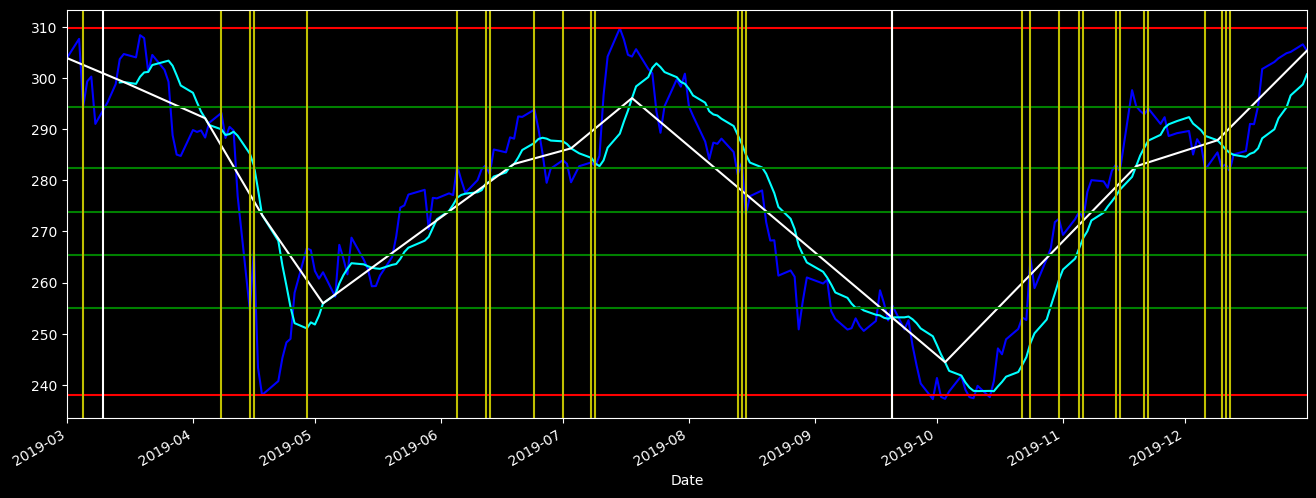

In [109]:

#for stock_name in stock_tags:
#    get_graph(stock_name, '2019-3-1','2019-12-31','2019-3-10','2019-9-20')

get_graph('ANTM', '2019-3-1','2019-12-31','2019-3-10','2019-9-20')